In [2]:
# lets import the package

import numpy as np
import pandas as pd
import sklearn
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt 


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn import metrics
from IPython.display import Image
#from pydotplus import graph_from_dot_data




In [ ]:
# In this brieth analysis, we will shift our focus on a current trend the topic of

In [48]:
#. Lets import our data and obtain the first five rows.
df = pd.read_csv("/Users/jephteestiverne/Desktop/CovidProject/Covid_Sample_Data.csv")
#print(df)
df.head(6)

,Unnamed: 0,State,Start_week,End_week,Total_Deaths,Place_of_Death
0,1,United States,2020-02-01,2020-11-07,716707,"Healthcare Setting, Inpatient"
1,2,United States,2020-02-01,2020-11-07,145939,"Healthcare Setting, Outpatient or Emergency Room"
2,3,United States,2020-02-01,2020-11-07,7013,"Healthcare Setting, Dead on Arrival"
3,4,United States,2020-02-01,2020-11-07,833215,Decedent's Home
4,5,United States,2020-02-01,2020-11-07,153348,Hospice Facility
5,6,United States,2020-02-01,2020-11-07,424540,Nursing Home or Long Term Care Facility


In [4]:
df.apply(lambda x: sum(x.isnull()), axis=0)
# Checking data frame for missing values, we can observe a large number of missing data in the meridian  

Unnamed: 0        0
State             0
Start_week        0
End_week          0
Total_Deaths      0
Place_of_Death    0
dtype: int64

In [5]:
# Let's now convert all the dataframe values to numeric. 
df.dtypes

Unnamed: 0         int64
State             object
Start_week        object
End_week          object
Total_Deaths       int64
Place_of_Death    object
dtype: object

In [6]:
df["State"] = df["State"].astype("|S")

In [7]:
# Let's now obtain our column names in the form of a list vector.  
df.columns.tolist()

['Unnamed: 0',
 'State',
 'Start_week',
 'End_week',
 'Total_Deaths',
 'Place_of_Death']

In [8]:
# Lets drop the unnecessary columns to avoid the dummy variable trap
df = df.drop(['Unnamed: 0','State',
 'Start_week',
 'End_week',], axis=1)



In [9]:
df.head(6)

,Total_Deaths,Place_of_Death
0,716707,"Healthcare Setting, Inpatient"
1,145939,"Healthcare Setting, Outpatient or Emergency Room"
2,7013,"Healthcare Setting, Dead on Arrival"
3,833215,Decedent's Home
4,153348,Hospice Facility
5,424540,Nursing Home or Long Term Care Facility


In [11]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=12, random_state=1)
new = df._get_numeric_data().dropna(axis=1)
km.fit(new)
predict=km.predict(new)

df['Places'] = pd.Series(predict, index=df.index)

In [12]:
# Lets drop the unnecessary columns to avoid the dummy variable trap
df = df.drop(['Place_of_Death',], axis=1)

df.head(6)

,Total_Deaths,Places
0,716707,1
1,145939,5
2,7013,8
3,833215,6
4,153348,5
5,424540,2


In [13]:
# Let's now obtain five percent of our sample data and do a Pairwise Plots. Note that this is computationally expensive.
df_sample = df.sample(frac=0.05)
# Pairwise plots
#pplot = sns.pairplot(df_sample, hue="Theft_Binary")



In [14]:
# Let's create a binary variable for the emphasis on theft. 
df['Death_Binary'] = np.where(df['Total_Deaths'] > 0,1,0)
# confirming our new column binary variable
df.head(6)

,Total_Deaths,Places,Death_Binary
0,716707,1,1
1,145939,5,1
2,7013,8,1
3,833215,6,1
4,153348,5,1
5,424540,2,1


In [15]:
x = len(df[df['Death_Binary'] == 1])
x# total theft in our sample crimes  = 108905
y = len(df[df['Death_Binary'] == 0])
y# total NOT theft in our sample crimes  = 379365
z = (round(float(len(df[df['Death_Binary'] == 1])) / len(df) * 100), 3)# % people left = 24.0%
# percentage of crimes that are theft related 
z

(91, 3)

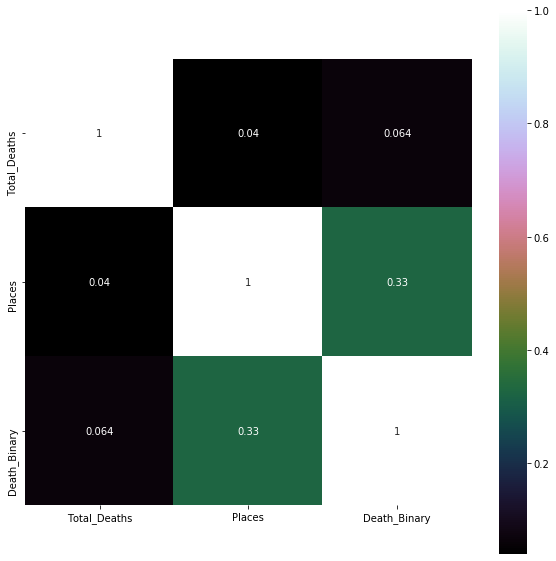

In [16]:
# We can also use a Correlation heatmap. The importance of the aesthetics of a heatmap cannot be overlooked; after all, the main purpose of creating a graphic representation of data is for better understanding. This article will walk you through several ways that a correlation heatmap can be tweaked or customized to improve its readability, which is essential to effectively present your data.
# Reference : https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
# Notice how our binary variable has a mostly positive correlation.  

In [20]:
#Let's now generate a Crime Variable and then use it to make our dummy variable. 
Covid = np.random.choice(['Death','No_Death'], 4)
df1 = pd.DataFrame(Covid, columns=['Covid'])
# Generate a One hot encode Crime
dummies = pd.get_dummies(df1['Covid'])
# Joining our dummies to 'df1'
df1 = df1.join(dummies)
print (df1)

      Covid  Death  No_Death
0  No_Death      0         1
1  No_Death      0         1
2     Death      1         0
3  No_Death      0         1


In [21]:
# Lets drop the unnecessary columns to avoid the dummy variable trap
#df = df.drop(['Unnamed: 0','state'
# 'Start_week',
# 'End_week',], axis=1)

In [22]:
df.head(6)

,Total_Deaths,Places,Death_Binary
0,716707,1,1
1,145939,5,1
2,7013,8,1
3,833215,6,1
4,153348,5,1
5,424540,2,1


In [23]:
# Lets now Randomly split the data into test, training, and validation sets.
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
# This is crucial to avoid having one subgroup of the data overrepresented in either our training or testing datasets, hence df.sample(Wikipedia).
print (train.shape, test.shape, validate.shape)
#(292903, 4) (97635, 4) (97635, 4)




(249, 3) (83, 3) (83, 3)


In [24]:
# Separate target and predictors
y_train = train['Death_Binary']
x_train = train.drop(['Death_Binary'], axis=1)
y_test = test['Death_Binary']
x_test = test.drop(['Death_Binary'], axis=1)
y_validate = validate['Death_Binary']
x_validate = validate.drop(['Death_Binary'], axis=1)

In [25]:
# Check the balance of the splits on y_. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest().
y_test.mean()
# 0.22155774469043768
y_train.mean()
#0.22284460100627385

0.9076305220883534

In [67]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import seaborn
from datetime import date
from datetime import datetime
today = date.today()
sns.set_color_codes("dark")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans


In [26]:
# Lets now create a variable list and drop the unnecessaryall_vars = x_train.columns.tolist()
three_vars = ['Total_Deaths', 'Places' ]
bottom_vars = [cols for cols in three_vars if cols not in three_vars]

# Drop less important variables leaving the three variables
x_train    = x_train.drop(bottom_vars, axis=1)
x_test     = x_test.drop(bottom_vars, axis=1)
x_validate = x_validate.drop(bottom_vars, axis=1)

In [28]:
# Variable importance
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print("Features sorted by their score:")
Rf_importance = (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_train), reverse=True))# Variable importance
print(Rf_importance)

Features sorted by their score:
[(0.9359, 'Total_Deaths'), (0.0641, 'Places')]


In [27]:
# Lets now measure the accuracy of our our model. Reinstating the objective question: Assume you have been selected to help the Chicago Police Department build the machine learning services which will power their next generation of mobile crime analytics software. This software aims in particular at predicting, in real-time, the category of a crime as soon as it is being reported by an emergency call (for instance ‘robbery’, ‘assault’, ‘theft’).
logit_model = LogisticRegression()
# Let's Fit the model
logit_model = logit_model.fit(x_train, y_train)
# Now we want to know "how accurate?" is the model
logit_model.score(x_train, y_train)
#0.777499



1.0

In [83]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Now, how does it perform on our test dataset?
# Predictions on the test dataset is 0.776217. 
predicted = pd.DataFrame(logit_model.predict(x_test))
# Probabilities on the test dataset
probs = pd.DataFrame(logit_model.predict_proba(x_test))
print (metrics.accuracy_score(y_test, predicted))

1.0


In [30]:
# Let's now take a look at the confusion matrix and the metrics we care for.
print (metrics.confusion_matrix(y_test, predicted))#[[75786     0][21849     0]]
print (metrics.classification_report(y_test, predicted))

[[10  0]
 [ 0 73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        73

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
# Random Forest 
rf = RandomForestClassifier()    
rf_model = rf.fit(x_train, y_train)
rf_model.score(x_train, y_train)
predicted = pd.DataFrame(rf_model.predict(x_test))
probs = pd.DataFrame(rf_model.predict_proba(x_test))
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
rf_classification_report = metrics.classification_report(y_test, predicted)
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)
rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, scoring='precision', cv=10)
rf_cv_mean = np.mean(rf_cv_scores)

In [33]:
rf_cv_mean

1.0

In [34]:
# TWO CLASS BAYES 
bayes_model = GaussianNB()
bayes_model.fit(x_train, y_train)
bayes_model.score(x_train, y_train)
predicted = pd.DataFrame(bayes_model.predict(x_test))
probs = pd.DataFrame(bayes_model.predict_proba(x_test))
bayes_accuracy = metrics.accuracy_score(y_test, predicted)
bayes_roc_auc = metrics.roc_auc_score(y_test, probs[1])
bayes_confus_matrix = metrics.confusion_matrix(y_test, predicted)
bayes_classification_report = metrics.classification_report(y_test, predicted)
bayes_precision = metrics.precision_score(y_test, predicted, pos_label=1)
bayes_recall = metrics.recall_score(y_test, predicted, pos_label=1)
bayes_f1 = metrics.f1_score(y_test, predicted, pos_label=1)
bayes_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)
bayes_cv_mean = np.mean(bayes_cv_scores)

In [35]:
bayes_cv_mean

1.0

In [36]:
from pydotplus import graph_from_dot_data

In [37]:
# SUPPORT VECTOR MACHINE
svm_model = SVC(probability=True)
svm_model = svm_model.fit(x_train, y_train)
svm_model.score(x_train, y_train)
predicted = pd.DataFrame(svm_model.predict(x_test))
probs = pd.DataFrame(svm_model.predict_proba(x_test))
svm_accuracy = metrics.accuracy_score(y_test, predicted)
svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted)
svm_precision = metrics.precision_score(y_test, predicted, pos_label=1)
svm_recall = metrics.recall_score(y_test, predicted, pos_label=1)
svm_f1 = metrics.f1_score(y_test, predicted, pos_label=1)
svm_cv_scores = cross_val_score(SVC(probability=True), x_test, y_test, scoring='precision', cv=10)
svm_cv_mean = np.mean(svm_cv_scores)

/Users/jephteestiverne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
svm_cv_mean

0.8791666666666667

In [39]:
#  Decision Tree with maximum depth of 3
tree_model = tree.DecisionTreeClassifier(max_depth=3)
tree_model = tree_model.fit(x_train, y_train)
tree_model.score(x_train, y_train)
predicted = pd.DataFrame(tree_model.predict(x_test))
probs = pd.DataFrame(tree_model.predict_proba(x_test))
tree_accuracy = metrics.accuracy_score(y_test, predicted)
tree_roc_auc = metrics.roc_auc_score(y_test, probs[1])
tree_confus_matrix = metrics.confusion_matrix(y_test, predicted)
tree_classification_report = metrics.classification_report(y_test, predicted)
tree_precision = metrics.precision_score(y_test, predicted, pos_label=1)
tree_recall = metrics.recall_score(y_test, predicted, pos_label=1)
tree_f1 = metrics.f1_score(y_test, predicted, pos_label=1)
tree_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), x_test, y_test, scoring='precision', cv=10)
dot_data = tree.export_graphviz(tree_model, out_file=None,
                     feature_names=x_test.columns.tolist(),
                     class_names=['remain', 'left'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graph_from_dot_data(dot_data)
graph.write_png("/Users/jephteestiverne/Desktop/Fall2020/ECON_622_01/decision_tree.png")

True

In [40]:
#Lets now compary themodel which works best for our dataset. 
models = pd.DataFrame({
  'Model': ['Logistic', 'd.Tree', 'r.f.', 'SVM', 'kNN',  'Bayes'],
  'Accuracy' : [logit_accuracy, tree_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, bayes_accuracy],
  'Precision': [logit_precision, tree_precision, rf_precision, svm_precision, knn_precision, bayes_precision],
  'recall' : [logit_recall, tree_recall, rf_recall, svm_recall, knn_recall, bayes_recall],
  'F1' : [logit_f1, tree_f1, rf_f1, svm_f1, knn_f1, bayes_f1],
  'cv_precision' : [logit_cv_mean, tree_cv_mean, rf_cv_mean, svm_cv_mean, knn_cv_mean, bayes_cv_mean]
})
# Print table and sort by test precision
table = models.sort_values(by='Precision', ascending=False)



NameError: name 'logit_accuracy' is not defined

In [42]:
#table

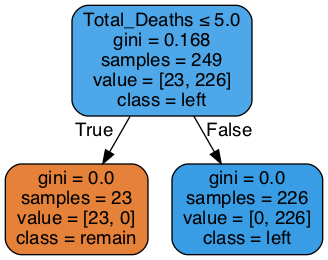

In [43]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "/Users/jephteestiverne/Desktop/Fall2020/ECON_622_01/decision_tree.png", width = 600, height = 300)

In [ ]:
# Multi column

In [49]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=10, centers=3, n_features=3)

df = pd.DataFrame(X, columns=['State','Total_Deaths','Place_of_Death'])

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(df[['State','Total_Deaths','Place_of_Death']])

df['Cluster'] = y

print(df.head())

      State  Total_Deaths  Place_of_Death  Cluster
0 -7.602652     -6.231181        1.559039        1
1 -9.170452     -6.598017       -0.143467        1
2  0.766870      4.338255        3.862665        0
3  9.557854      4.674793       -6.761902        2
4  9.031327      4.284545       -5.876104        2


In [50]:
# Let's create a binary variable for the emphasis on theft. 
df['Death_Binary'] = np.where(df['Total_Deaths'] > 0,1,0)
# confirming our new column binary variable
df.head(6)

,State,Total_Deaths,Place_of_Death,Cluster,Death_Binary
0,-7.602652,-6.231181,1.559039,1,0
1,-9.170452,-6.598017,-0.143467,1,0
2,0.766870,4.338255,3.862665,0,1
3,9.557854,4.674793,-6.761902,2,1
4,9.031327,4.284545,-5.876104,2,1
5,-8.380741,-7.964337,-0.970486,1,0


In [51]:
x = len(df[df['Death_Binary'] == 1])
x# total theft in our sample crimes  = 108905
y = len(df[df['Death_Binary'] == 0])
y# total NOT theft in our sample crimes  = 379365
z = (round(float(len(df[df['Death_Binary'] == 1])) / len(df) * 100), 3)# % people left = 24.0%
# percentage of crimes that are theft related 
z

(70, 3)

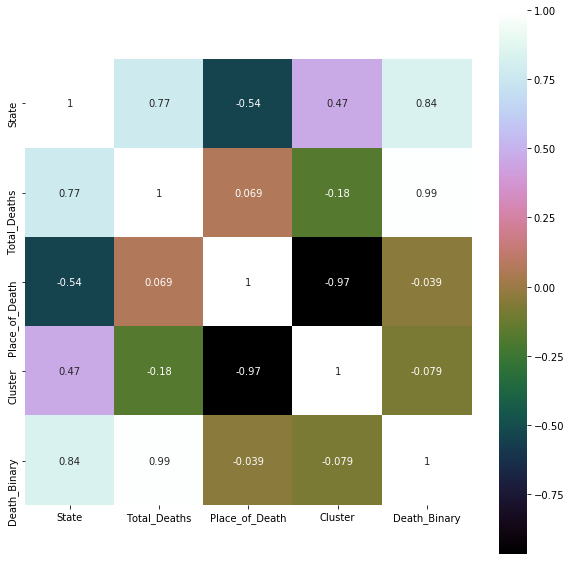

In [52]:
# We can also use a Correlation heatmap. The importance of the aesthetics of a heatmap cannot be overlooked; after all, the main purpose of creating a graphic representation of data is for better understanding. This article will walk you through several ways that a correlation heatmap can be tweaked or customized to improve its readability, which is essential to effectively present your data.
# Reference : https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
# Notice how our binary variable has a mostly positive correlation.  

In [53]:
#Let's now generate a Crime Variable and then use it to make our dummy variable. 
Covid = np.random.choice(['Death','No_Death'], 4)
df1 = pd.DataFrame(Covid, columns=['Covid'])
# Generate a One hot encode Crime
dummies = pd.get_dummies(df1['Covid'])
# Joining our dummies to 'df1'
df1 = df1.join(dummies)
print (df1)

      Covid  Death  No_Death
0  No_Death      0         1
1  No_Death      0         1
2  No_Death      0         1
3     Death      1         0


In [54]:
# Lets now Randomly split the data into test, training, and validation sets.
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
# This is crucial to avoid having one subgroup of the data overrepresented in either our training or testing datasets, hence df.sample(Wikipedia).
print (train.shape, test.shape, validate.shape)
#(292903, 4) (97635, 4) (97635, 4)



(6, 5) (2, 5) (2, 5)


In [55]:
# Separate target and predictors
y_train = train['Death_Binary']
x_train = train.drop(['Death_Binary'], axis=1)
y_test = test['Death_Binary']
x_test = test.drop(['Death_Binary'], axis=1)
y_validate = validate['Death_Binary']
x_validate = validate.drop(['Death_Binary'], axis=1)

In [56]:
# Check the balance of the splits on y_. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest().
y_test.mean()
# 0.22155774469043768
y_train.mean()
#0.22284460100627385

0.6666666666666666

In [57]:
# Variable importance
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print("Features sorted by their score:")
Rf_importance = (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_train), reverse=True))# Variable importance
print(Rf_importance)

Features sorted by their score:
[(0.3901, 'State'), (0.3874, 'Total_Deaths'), (0.128, 'Cluster'), (0.0945, 'Place_of_Death')]


In [58]:
# Lets now measure the accuracy of our our model. Reinstating the objective question: Assume you have been selected to help the Chicago Police Department build the machine learning services which will power their next generation of mobile crime analytics software. This software aims in particular at predicting, in real-time, the category of a crime as soon as it is being reported by an emergency call (for instance ‘robbery’, ‘assault’, ‘theft’).
logit_model = LogisticRegression()
# Let's Fit the model
logit_model = logit_model.fit(x_train, y_train)
# Now we want to know "how accurate?" is the model
logit_model.score(x_train, y_train)
#0.777499




1.0

In [59]:
# Now, how does it perform on our test dataset?
# Predictions on the test dataset is 0.776217. 
predicted = pd.DataFrame(logit_model.predict(x_test))
# Probabilities on the test dataset
probs = pd.DataFrame(logit_model.predict_proba(x_test))
print (metrics.accuracy_score(y_test, predicted))

1.0


In [60]:
# Let's now take a look at the confusion matrix and the metrics we care for.
print (metrics.confusion_matrix(y_test, predicted))#[[75786     0][21849     0]]
print (metrics.classification_report(y_test, predicted))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [61]:
from sklearn.model_selection import cross_val_score

In [68]:
#. Lets import our data and obtain the first five rows.
df = pd.read_csv("/Users/jephteestiverne/Desktop/CovidProject/Covid_Sample_Data.csv")
#print(df)
df.head(6)

,Unnamed: 0,State,Start_week,End_week,Total_Deaths,Place_of_Death
0,1,United States,2020-02-01,2020-11-07,716707,"Healthcare Setting, Inpatient"
1,2,United States,2020-02-01,2020-11-07,145939,"Healthcare Setting, Outpatient or Emergency Room"
2,3,United States,2020-02-01,2020-11-07,7013,"Healthcare Setting, Dead on Arrival"
3,4,United States,2020-02-01,2020-11-07,833215,Decedent's Home
4,5,United States,2020-02-01,2020-11-07,153348,Hospice Facility
5,6,United States,2020-02-01,2020-11-07,424540,Nursing Home or Long Term Care Facility


In [69]:
# Lets drop the unnecessary columns to avoid the dummy variable trap
df = df.drop(['Unnamed: 0',
 'Start_week',
 'End_week',], axis=1)



In [70]:
df.head(6)

,State,Total_Deaths,Place_of_Death
0,United States,716707,"Healthcare Setting, Inpatient"
1,United States,145939,"Healthcare Setting, Outpatient or Emergency Room"
2,United States,7013,"Healthcare Setting, Dead on Arrival"
3,United States,833215,Decedent's Home
4,United States,153348,Hospice Facility
5,United States,424540,Nursing Home or Long Term Care Facility


In [71]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=3, centers=3, n_features=3)

df = pd.DataFrame(X, columns=['State','Total_Deaths','Place_of_Death'])

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(df[['State','Total_Deaths','Place_of_Death']])

df['Cluster'] = y

print(df.head())

      State  Total_Deaths  Place_of_Death  Cluster
0 -2.513752     -5.634006       -9.376058        1
1 -7.052939      5.388439       -1.680049        2
2 -5.899495      0.151991        1.393917        0


In [72]:
# Let's create a binary variable for the emphasis on theft. 
df['Death_Binary'] = np.where(df['Total_Deaths'] > 0,1,0)
# confirming our new column binary variable
df.head(6)

,State,Total_Deaths,Place_of_Death,Cluster,Death_Binary
0,-2.513752,-5.634006,-9.376058,1,0
1,-7.052939,5.388439,-1.680049,2,1
2,-5.899495,0.151991,1.393917,0,1


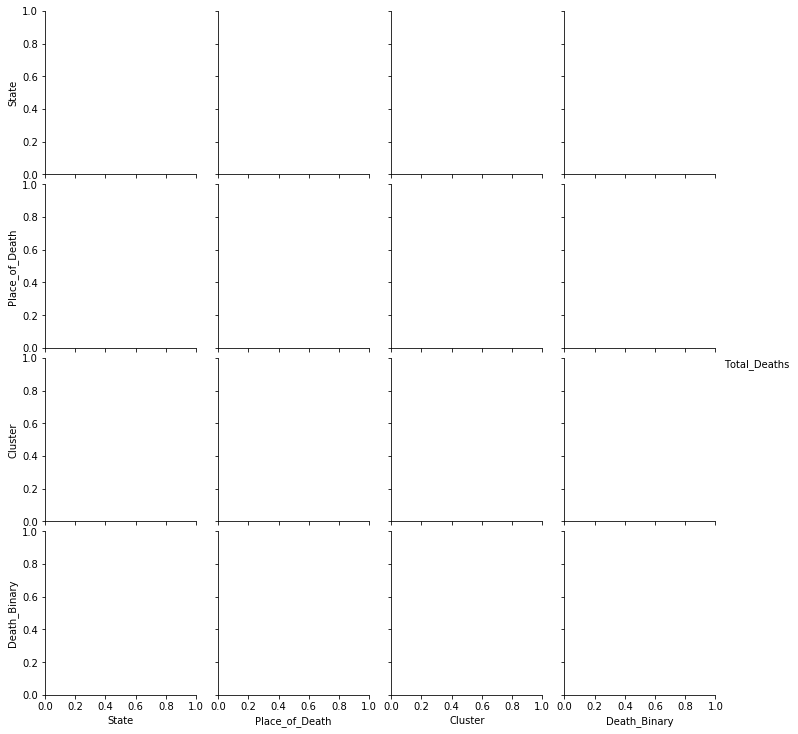

In [77]:
# Let's now obtain five percent of our sample data and do a Pairwise Plots. Note that this is computationally expensive.
df_sample = df.sample(frac=0.05)
#Pairwise plots
pplot = sns.pairplot(df_sample, hue="Total_Deaths")


